<ipython-input-1-4bf0d3c14899>:13: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*e - x**2 - y**2 - 2*x**2*y + 2/3*y**3 - dy**2)


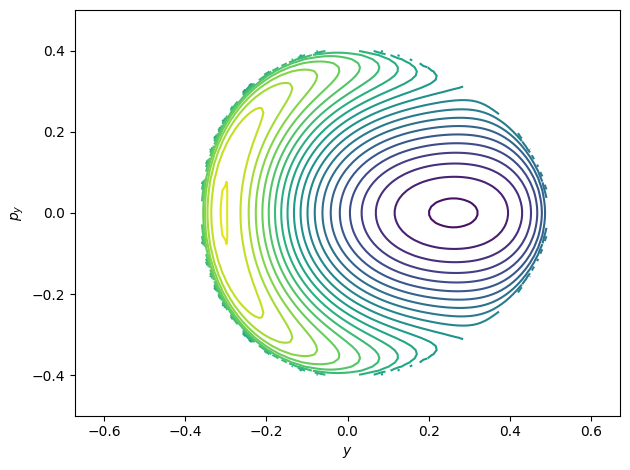

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define axis grid
x = np.linspace(-0.5, 0.5, 100)
y = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(x, y)
# Z = np.sin(np.sqrt(X**2 + Y**2))

def dx_(x,y,dy,e): # dx^2=(E-V)-dy^2
    # s = random.choice([-1,1])
    return np.sqrt(2*e - x**2 - y**2 - 2*x**2*y + 2/3*y**3 - dy**2)

def J(y,dy): # Assumes x=0 and E = 1/12
    y = np.array(y)
    dy = np.array(dy)
    dx=dx_(0,y,dy,E)

    # l1 = -0.0161836 + 0.0704348*y - 0.064058*y**2 - 0.437121*y**3 + 1.63609*y**4 - 2.90249*y**5 + 1.67105*y**6
    # l3 = -0.00550725 + 0.211304*y - 0.741739*y**2 + 0.917449*y**3

    # Bad
    # l3 = 0.212751 + 0.211304*y - 0.741739*y**2 + 1.39762*y**3
    # l1 = -0.0161836 + 0.0704348*y - 0.391445*y**2 + 0.457737*y**3 + 2.12717*y**4 - 4.343*y**5 + 3.4476*y**6

    # Solution based on the idea that higher order terms contribute less,
    # i.e., P_6,0 and P_0,4 are set to zero.
    l3 = -3.33253 + 0.211304*y - 0.741739*y**2 + 1.39762*y**3
    l1 = -0.0161836 - 3.82937*y + 4.92647*y**2 - 10.1781*y**3 - 4.343*y**5 + 3.4476*y**6

    return l1*dx + l3*(dx**3-3*dx*dy**2) + (dx**5-10*dx**3*dy**2+5*dx*dy**4)/5





E = 1/12        # Set energy
Z = J(X,Y)    # Define levels

# # Ploting contour
plt.contour(X, Y, Z, 20)
plt.xlabel('$y$')
plt.ylabel('$p_y$')
# plt.xlim(-0.5,0.5)
# plt.ylim(-0.5,0.5)
# plt.title('deg = 5, E = 1/12')
plt.axis('equal')
plt.tight_layout()

# Uncomment to save high quality png
plt.savefig('deg5-contour.png', dpi=300)

plt.show()

<ipython-input-2-648784205701>:13: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*e - x**2 - y**2 - 2*x**2*y + 2/3*y**3 - dy**2)


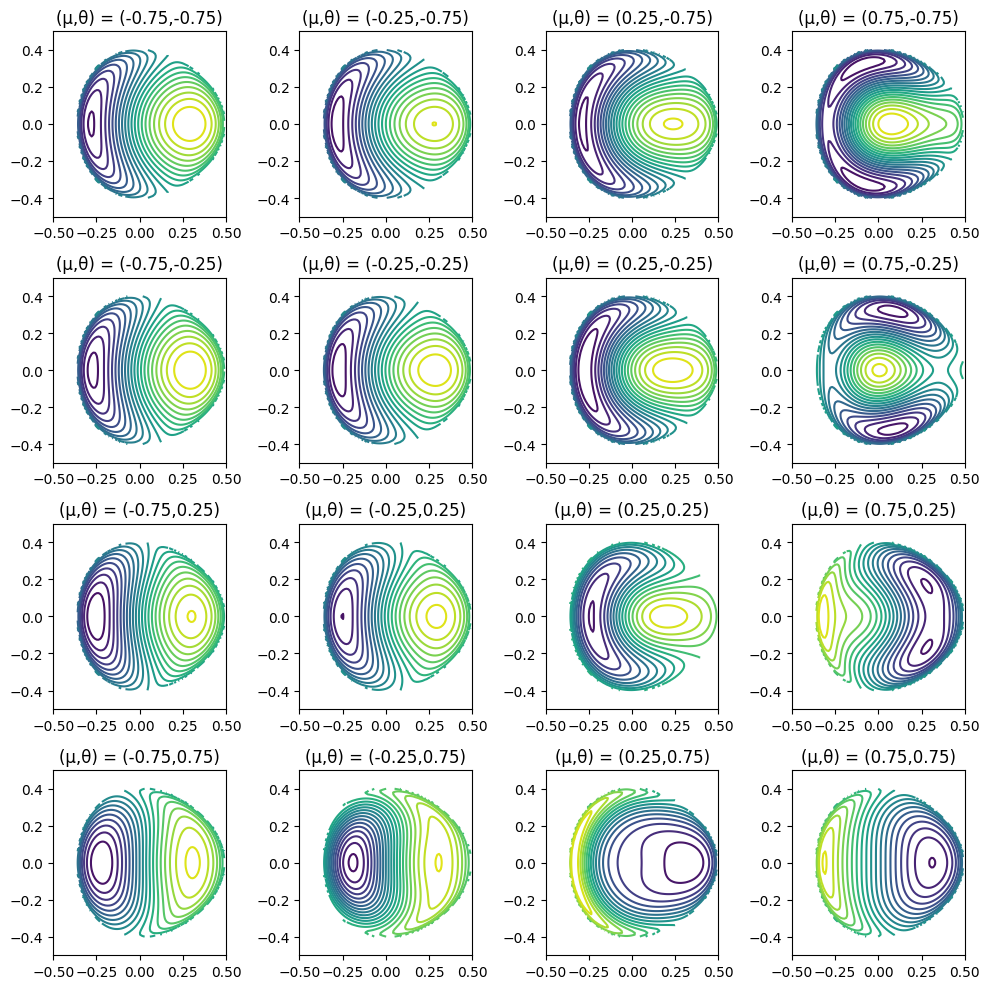

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define axis grid
x = np.linspace(-0.5, 0.5, 100)
y = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(x, y)
# Z = np.sin(np.sqrt(X**2 + Y**2))

def dx_(x,y,dy,e): # dx^2=(E-V)-dy^2
    # s = random.choice([-1,1])
    return np.sqrt(2*e - x**2 - y**2 - 2*x**2*y + 2/3*y**3 - dy**2)

def J(y,dy,e,mu,th): # Assumes x=0 and E = 1/12
    y = np.array(y)
    dy = np.array(dy)
    dx=dx_(0,y,dy,e)

    l1 = (-0.0161836 + y**2*(-0.322319 + 0.5*th) + y**5*(-2.15014 - 4*mu)
        + y*(0.385217 - 0.366667*th - 0.666667*mu)
        + y**3*(-0.0459903 - th + 0.666667*mu)
        + y**4*(1.5513 - 0.2*th + mu) + y**6*(0.341063 + 5.66667*mu))
    l3 = 0.211304*y - 0.741739*y**2 + 0.166667*(1 - th) - 0.166667*th - 0.666667*y**3*(-1 - mu) + 0.666667*y**3*mu

    return l1*dx + l3*(dx**3-3*dx*dy**2) + (dx**5-10*dx**3*dy**2+5*dx*dy**4)/5


E = 1/12        # Set energy

# Set the range for mu and theta to vary.
mu_list = np.linspace(-0.75,0.75,4)
th_list = np.linspace(-0.75,0.75,4)

fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i,mu in enumerate(mu_list):
    for j,th in enumerate(th_list):
        axs[j][i].contour(X,Y,J(X,Y,E,mu,th),20)
        axs[j][i].set_title(f'(μ,θ) = ({mu},{th})')

# # Ploting contour
# plt.contour(X, Y, Z, 20)
# plt.xlabel('mu')
# plt.ylabel('$\dot y$')
# plt.xlim(-0.5,0.5)
# plt.ylim(-0.5,0.5)
# plt.title('Contour Plot of 3rd Integral $deg(J)=5$')
# plt.text(-0.45,0.4,f'$E={E}$')
plt.tight_layout()

plt.savefig('deg5-var.png', dpi=300)

plt.show()